

Q1: Question No.1. Vision Dataset: The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal). Please find your dataset from the link - https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

**Dataset :Chest X-Ray Images (Pneumonia)**

**Problem Type :  classification**


Import Libraries/Dataset 


In [1]:
import seaborn as sns
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from keras import regularizers
import tensorflow as tf
from timeit import default_timer as timer


from google.colab import drive
import os

drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive/MyDrive
%cd /content/gdrive/MyDrive/kaggle/input
directory = os.getcwd()


Mounted at /content/gdrive/
/content/gdrive/MyDrive
/content/gdrive/MyDrive/kaggle/input


In [2]:
#Checking available GPU's
print(tf.config.list_physical_devices('GPU'))
print(tf.test.gpu_device_name())

[]



Extracting image names and path address from Google drive

In [3]:
paths_normal = []
paths_pneumonia = []
filename_nrml=[]
filename_pnuemonia=[]

test_normal = []
test_pneumonia = []
for dirname, _, filenames in os.walk("/content/gdrive/MyDrive/kaggle/input/train/NORMAL/"):
    for filename in filenames:
        filename_nrml.append(filename)
        paths_normal.append(os.path.join(dirname, filename))
    
for dirname, _, filenames in os.walk("/content/gdrive/MyDrive/kaggle/input/train/PNEUMONIA/"):
    for filename in filenames:
        filename_pnuemonia.append(filename)
        paths_pneumonia.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk("/content/gdrive/MyDrive/kaggle/input/test/NORMAL/"):
    for filename in filenames:
        test_normal.append(os.path.join(dirname, filename))
    
for dirname, _, filenames in os.walk("/content/gdrive/MyDrive/kaggle/input/test/PNEUMONIA/"):
    for filename in filenames:
        test_pneumonia.append(os.path.join(dirname, filename))        


Checking the no. of images in training dataset for both class types

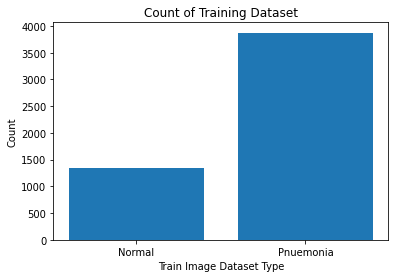

In [4]:
my_dict = {}
my_dict = {'Normal': len(paths_normal), 'Pnuemonia': len(paths_pneumonia)}
fig, ax = plt.subplots()
plt.bar(*zip(*my_dict.items()))
plt.title('Count of Training Dataset')
plt.xlabel('Train Image Dataset Type')
plt.ylabel('Count')      
plt.show()

Initializing the List for storing train and test data

In [5]:

label_normal = np.zeros((len(paths_normal),1))
label_pneumonia = np.ones((len(paths_pneumonia),1))
label = list(np.concatenate((label_normal,label_pneumonia),axis = 0));
paths = paths_normal[0:len(paths_normal)] + paths_pneumonia[0:len(paths_pneumonia)]


label_normaltest = np.zeros((len(test_normal),1))
label_pneumoniatest = np.ones((len(test_pneumonia),1))
label_test = list(np.concatenate((label_normaltest,label_pneumoniatest),axis = 0));
paths_test = test_normal[0:len(test_normal)] + test_pneumonia[0:len(test_pneumonia)]

Preparing the dataset for training and test data

In [6]:
d = {'paths': paths, 'label': label}
df = pd.DataFrame(data=d)

df = df.sample(frac = 1)
d_test = {'paths': paths_test, 'label': label_test}
df_test = pd.DataFrame(data=d_test)


Bring the train and test data in the required format & Print the shapes of train and test data


In [7]:
X = np.zeros((1,100*100),np.uint8)
y = np.zeros((1,1),np.uint8)
for count,ele in enumerate (df.iloc[:,0],0): 
    y_temp = df.iloc[count,1]
    y = np.vstack((y,y_temp))
    X_temp = cv.imread(ele,cv.IMREAD_GRAYSCALE) 
    X_temp = cv.resize(X_temp,(100,100)).reshape(1,100*100)
    X = np.vstack((X,X_temp))

print("Train Data Reshaping Done")
X_train = X[1:,:]
Y_train = y[1:,:]
print(X_train.shape)
print(Y_train.shape)

X_test = np.zeros((1,100*100),np.uint8)
Y_test = np.zeros((1,1),np.uint8)
for count,ele in enumerate (df_test.iloc[:,0],0): 
    y_temp = df_test.iloc[count,1]
    Y_test = np.vstack((Y_test,y_temp))
    X_temp = cv.imread(ele,cv.IMREAD_GRAYSCALE) 
    X_temp = cv.resize(X_temp,(100,100)).reshape(1,100*100)
    X_test = np.vstack((X_test,X_temp))
print("Test Data Reshaping Done")
X_test = X_test[1:,:]
Y_test = Y_test[1:,:]

print(X_test.shape)
print(Y_test.shape)

Train Data Reshaping Done
(5216, 10000)
(5216, 1)
Test Data Reshaping Done
(624, 10000)
(624, 1)


Plot at least two samples from each class of the dataset

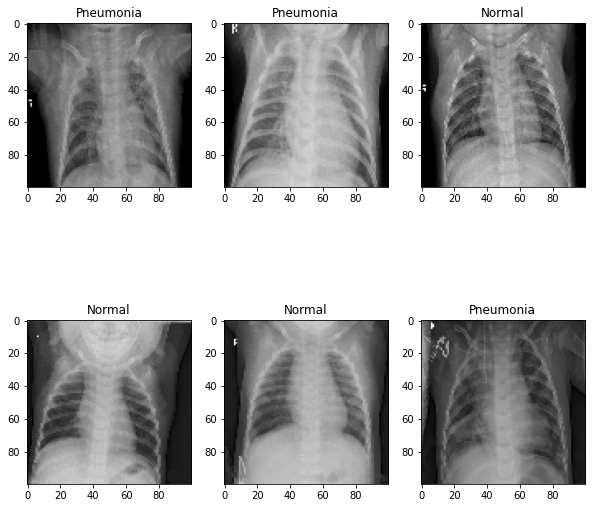

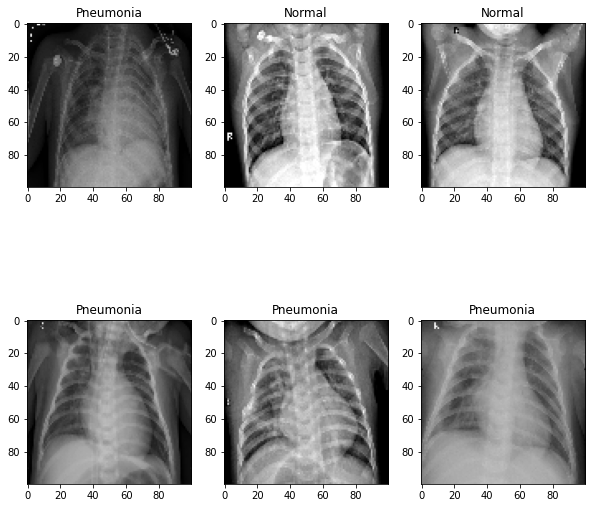

In [8]:
plt.figure(figsize=(10,10))
for count,i in enumerate(range(0,6),231):
    plt.subplot(count)
    if Y_train[i]==1:
        
        plt.title("Pneumonia")
        plt.imshow(X_train[i,:].reshape(100,100),'gray')
        
    elif Y_train[i]==0:
        plt.title("Normal")
        plt.imshow(X_train[i,:].reshape(100,100),'gray')

 
plt.figure(figsize=(10,10))
for count,i in enumerate(range(len(label_normal),len(label_normal)+6),231):
    plt.subplot(count)
    if Y_train[i]==1:       
        plt.title("Pneumonia")
        plt.imshow(X_train[i,:].reshape(100,100),'gray')
        
    elif Y_train[i]==0:
        plt.title("Normal")
        plt.imshow(X_train[i,:].reshape(100,100),'gray')        
       

Apply rotation and height shift augmentation (rotation_range, height_shift_range)to the dataset separately. Print the augmented image and the original image for each class and each augmentation.


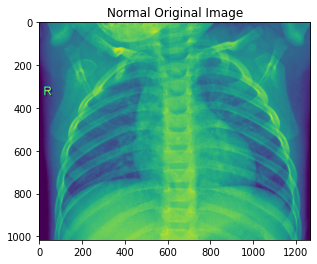

Augmented Image


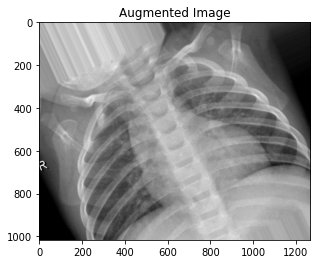

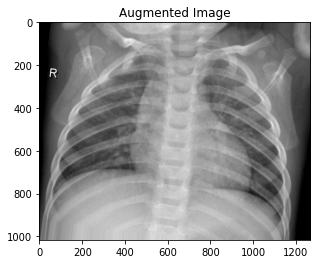

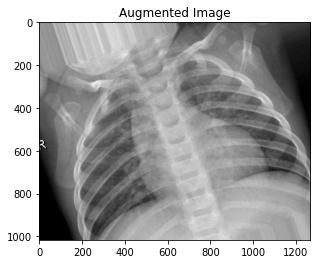

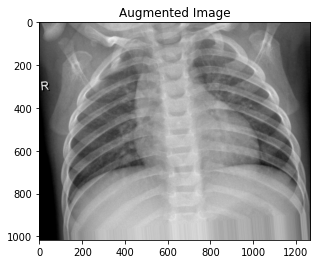

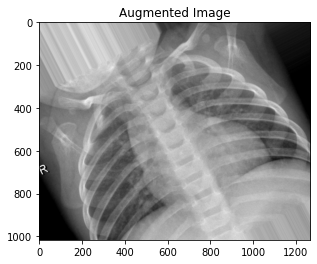

In [9]:
img_og= paths_normal[0]
# ImageDataGenerator rotation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_og)
imgplot = plt.imshow(img)
plt.title('Normal Original Image')

plt.show()
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(rotation_range = 30,height_shift_range = 0.1) 
imgX = load_img(img_og)  
x = img_to_array(imgX) 
     # Reshape the input image 
x = x.reshape((1, ) + x.shape)  
i = 0
%mkdir /content/augimg
#     # generate 4 new augmented images 
for batch in datagen.flow(x, batch_size = 1,save_to_dir= r'/content/augimg/', save_prefix ='aug', save_format ='jpeg'):
  i += 1
  if i > 4: 
    break
print ("Augmented Image")
image_path=[]   
for dirname, _, filenames in os.walk("/content/augimg"):
    for filename in filenames:
        image_path.append(os.path.join(dirname, filename))
for i in image_path:
  img = mpimg.imread(i)
  imgplot = plt.imshow(img)
  plt.title('Augmented Image')

  plt.show()
%rm -f /content/augimg/*.jpeg
%rmdir   /content/augimg

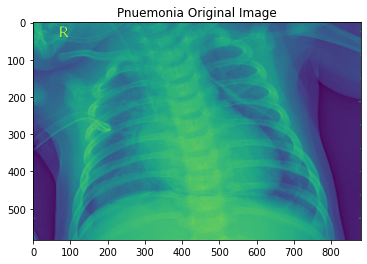

Augmented Image


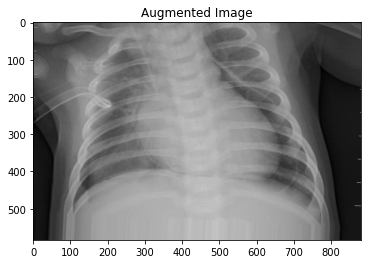

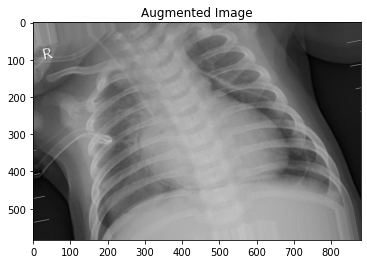

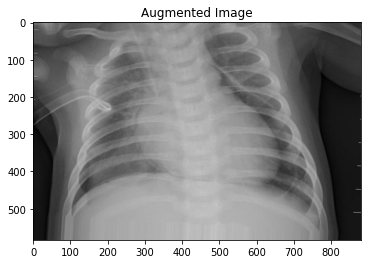

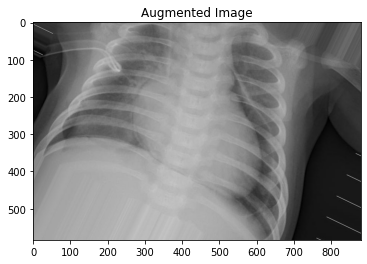

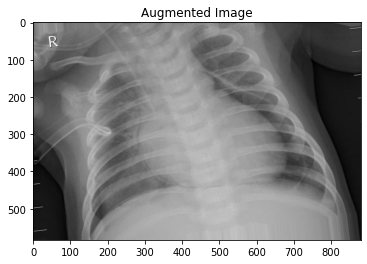

In [10]:
img_og= paths_pneumonia[0]
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_og)
imgplot = plt.imshow(img)
plt.title('Pnuemonia Original Image')

plt.show()
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(rotation_range = 30,height_shift_range = 0.1) 
imgX = load_img(img_og)  
x = img_to_array(imgX) 
     # Reshape the input image 
x = x.reshape((1, ) + x.shape)  
i = 0
%mkdir /content/augimg
#     # generate 4 new augmented images 
for batch in datagen.flow(x, batch_size = 1,save_to_dir= r'/content/augimg/', save_prefix ='aug', save_format ='jpeg'):
  i += 1
  if i > 4: 
    break
print ("Augmented Image")
image_path=[]   
for dirname, _, filenames in os.walk("/content/augimg"):
    for filename in filenames:
        image_path.append(os.path.join(dirname, filename))
for i in image_path:
  img = mpimg.imread(i)
  imgplot = plt.imshow(img)
  plt.title('Augmented Image')

  plt.show()
%rm -f /content/augimg/*.jpeg
%rmdir   /content/augimg

Normalizing the Training and Test dataset

In [11]:
X_trainN,X_testN = X_train[:,:]/255, X_test[:,:]/255


Initialize the Time call back for storing times.

In [12]:

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()


Implementing the model keeping following things in consideration.


*  Implementing Sequential Model with 5 hidden input layers.
*  L2 Regularization added at each layer
* Added one dropout layer at the appropriate position
* Appropriate Activation Function identified.
* Printed the Model summary

**Reason's :**

No.of hidden units: 
For hidden units we tried various combinations, we tried increasing and decreasing the unit's, but the best output was provided by the following no. of hidden units. Since our input data is more complex image data and is not easy to understand we need to choose high number of hidden units in our model to learn the input data and give good results. Similarly for hidden layers, we need more hidden layers as well.

Placement of dropout layer: as per combinations we tried placing the dropout layer at differnet positions/layers but it affected the accuracy of the model,as well as good effect of dropout can only be extracted when placed near the layer with higher number of nodes.




In [13]:

model = tf.keras.Sequential()
model.add(Dense(units = 784/2, activation = 'relu', kernel_regularizer=regularizers.l2(0.01),input_dim=X_train.shape[1]))
model.add(Dense(units = 784/4, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.1))

model.add(Dense(units = 784/8, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(units = 784/16, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units = 784/32, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 392)               3920392   
                                                                 
 dense_1 (Dense)             (None, 196)               77028     
                                                                 
 dropout (Dropout)           (None, 196)               0         
                                                                 
 dense_2 (Dense)             (None, 98)                19306     
                                                                 
 dense_3 (Dense)             (None, 49)                4851      
                                                                 
 dense_4 (Dense)             (None, 24)                1200      
                                                                 
 dense_5 (Dense)             (None, 1)                 2

Compile the model with the appropriate loss function and optimizer, accuracy as metric

**Reason for optimizer:**

The results of the Adam optimizer are generally better than every other optimization algorithms, have faster computation time, and require fewer parameters for tuning. Because of all that, Adam is recommended as the default optimizer for most of the applications. In this case, Adam optimizer provided better accuracy than other optimization algorithms (e.g. sgd)

In [14]:

model.compile(loss="binary_crossentropy",optimizer="adam", metrics = ['accuracy'])


Storing the history of model history fit with assigning some part for validation as well

In [15]:
model_history=model.fit(X_train, Y_train,validation_split=0.33, batch_size=45, epochs=90,callbacks=[cb])


Epoch 1/90
78/78 [==============================] - 6s 63ms/step - loss: 39.4809 - accuracy: 0.6620 - val_loss: 11.7444 - val_accuracy: 0.8252
Epoch 2/90
78/78 [==============================] - 5s 61ms/step - loss: 13.8528 - accuracy: 0.7819 - val_loss: 9.4444 - val_accuracy: 0.8351
Epoch 3/90
78/78 [==============================] - 5s 61ms/step - loss: 8.7930 - accuracy: 0.8566 - val_loss: 7.4032 - val_accuracy: 0.9152
Epoch 4/90
78/78 [==============================] - 5s 61ms/step - loss: 7.3321 - accuracy: 0.8944 - val_loss: 6.7681 - val_accuracy: 0.9187
Epoch 5/90
78/78 [==============================] - 5s 62ms/step - loss: 6.6752 - accuracy: 0.9058 - val_loss: 6.2176 - val_accuracy: 0.8966
Epoch 6/90
78/78 [==============================] - 5s 60ms/step - loss: 6.0718 - accuracy: 0.8950 - val_loss: 5.6374 - val_accuracy: 0.9402
Epoch 7/90
78/78 [==============================] - 5s 61ms/step - loss: 5.5789 - accuracy: 0.9130 - val_loss: 7.0778 - val_accuracy: 0.7474
Epoch 8/90

Plotting the model accuracy history

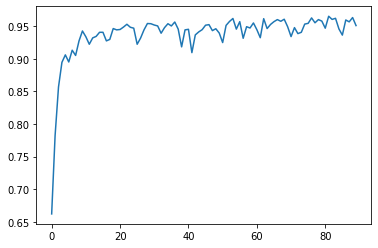

In [16]:
plt.plot(model_history.history['accuracy'])

Plotting the model validation accuracy history

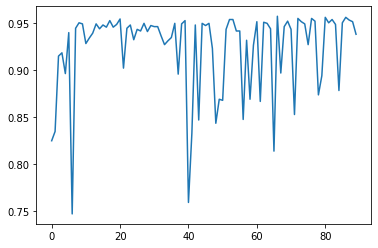

In [17]:
plt.plot(model_history.history['val_accuracy'])

Checking the model Accuracy and Loss for Test dataset

In [18]:
print("Accuracy of the model is - " , model.evaluate(X_test,Y_test)[1]*100 , "%")
print("Loss of the model is - " , model.evaluate(X_test,Y_test)[0])


20/20 [==============================] - 0s 16ms/step - loss: 0.9208 - accuracy: 0.8077
Accuracy of the model is -  80.7692289352417 %
20/20 [==============================] - 0s 16ms/step - loss: 0.9208 - accuracy: 0.8077
Loss of the model is -  0.9207801818847656


Plotting the Training & Validation Loss as well as accuracy

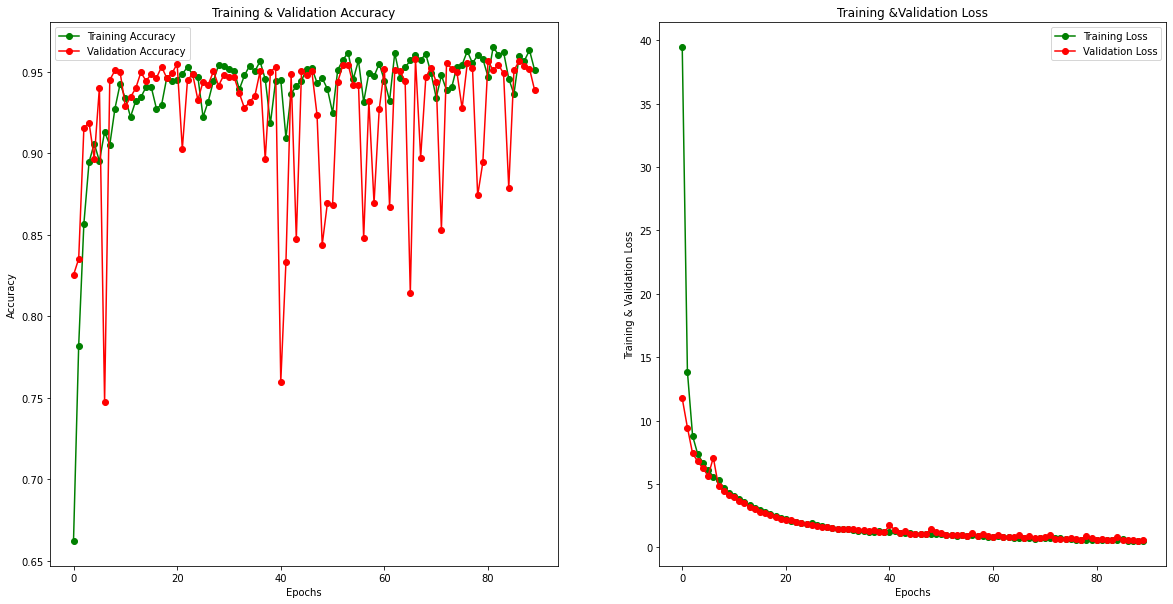

In [19]:
epochs = [i for i in range(90)]
fig , ax = plt.subplots(1,2)
train_acc = model_history.history['accuracy']
train_loss = model_history.history['loss']
val_acc = model_history.history['val_accuracy']
val_loss = model_history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training &Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

Predicting the model results and coverting it into 0 or 1 as per the predicted value

In [20]:
#Making Predictions on Test data
predicted = model.predict(X_test)
y_head_ann = [0 if i<0.5 else 1 for i in predicted]

Prediciting the Training time taken for the model

In [21]:
print("Training time taken:")
print(sum(cb.logs),"Seconds")


Training time taken:
444.4934947660049 Seconds


Checking the classification report for the model

In [22]:

print(classification_report(Y_test, y_head_ann, target_names = ['Pneumonia (Class 1)','Normal (Class 0)']))

                     precision    recall  f1-score   support

Pneumonia (Class 1)       0.90      0.55      0.68       234
   Normal (Class 0)       0.78      0.96      0.86       390

           accuracy                           0.81       624
          macro avg       0.84      0.76      0.77       624
       weighted avg       0.82      0.81      0.79       624



Displaying the classification report for the predicted records

0.8076923076923077
[[129 105]
 [ 15 375]]


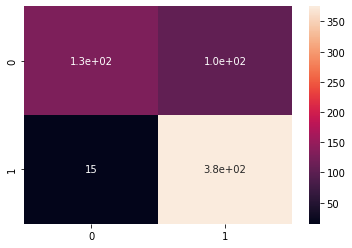

In [23]:
print(accuracy_score(Y_test, y_head_ann))
cm_ann = confusion_matrix(Y_test,y_head_ann)
sns.heatmap(cm_ann, annot=True) ;
print(cm_ann)

If we observe the results, some of the variables are not predicted correctly, Even not pneumonia, they are predicted that they have, also known as type I error.

High Chances of this may be due to distribution of data, if we see data distribution above in starting of this notebook. we had comparatively more data in Pnuemonia class as compared to the Normal class, this might be result of such imbalance.
It can be handled by generating more images using data augemntation as done above and using it in model as well. 

Misclassified Inputs:

[27 27 26 ... 16 18 21] has been classified as  1 and should be  [0.]
[31 32 31 ... 38 34 34] has been classified as  1 and should be  [0.]


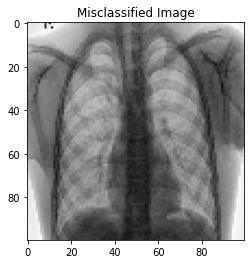

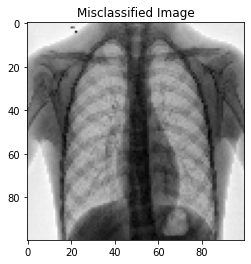

In [27]:
Itr=0
for X_inp, y_op, y_tst in zip(X_test, y_head_ann, Y_test):
  if y_op != y_tst:
    print(X_inp, 'has been classified as ', y_op, 'and should be ', y_tst) 
    XYZ=X_inp*255
    plt.figure(figsize=(4,4))
    plt.title('Misclassified Image')
    plt.imshow(XYZ.reshape(100,100),'gray')
    Itr=Itr+1
    if Itr>=2:
      break




Thanks,

Applied best of our knowledge.